In [38]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [39]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

# 1.

# На вход передатчика сигнала подается сигнал косинуса с частотами 50 и 150 Гц.

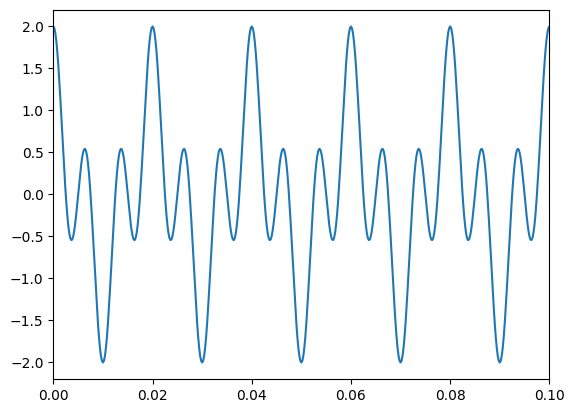

In [40]:
def cos_signal(t, f, A=1):
    '''
    Функция возвращает значение косинусоидального сигнала в заданный момент времени t.
    t - время, f - список частот сигнала, A - амплитуда сигнала.
    '''
    y = 0
    for i in f:
        w = 2 * np.pi * i
        y += A * np.cos(w * t)
    return y

num_cos = 5000  # количество отсчетов
f = [50, 150]
t_cos = np.linspace(0, 1, num_cos)# создание сигнала
y_cos = cos_signal(t_cos, f)
plt.plot(t_cos, y_cos,)
plt.xlim(0, 0.1)
plt.show()

# (a) Постройте дискретный спектр сигнала с помощью стандартной функции быстрого преобразования Фурье fft() и функции DFT_slow(). Сравните время вычисления этих двух функций.

In [41]:
def DFT_slow(x):
    '''
    Дискретное преобразование Фурье одномерного массива x
    '''
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N) # строка
    k = n.reshape((N, 1)) # столбец
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

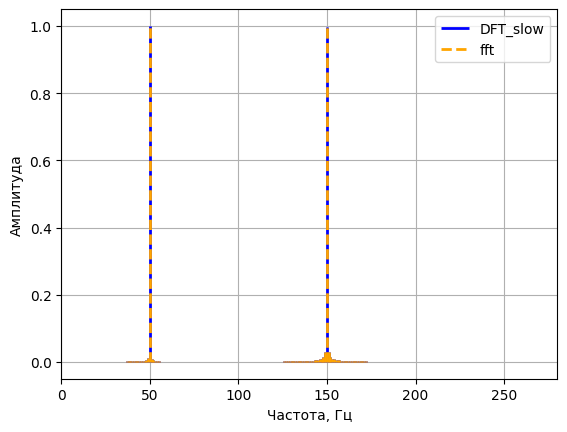

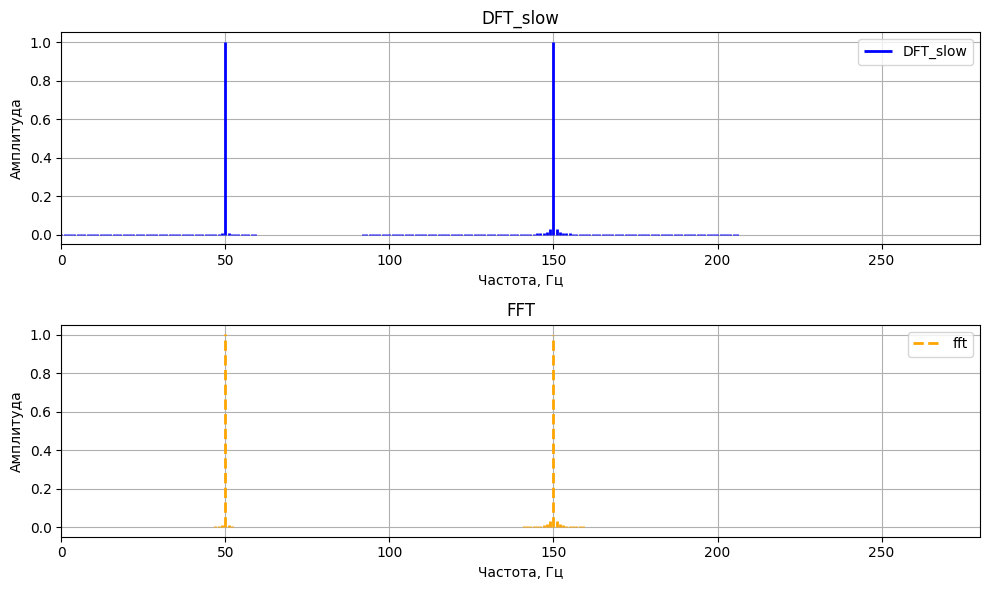

In [42]:
# дискретный спектр
freq_cos = np.fft.fftfreq(len(t_cos), d=(t_cos[1]-t_cos[0]))
yf = DFT_slow(y_cos)
yff = np.fft.fft(y_cos)
plt.vlines(freq_cos, 0, np.abs(yf) / num_cos * 2, linewidth=2, colors='blue', label='DFT_slow')
plt.vlines(freq_cos, 0, np.abs(yff) / num_cos * 2, linewidth=2, colors='orange', linestyles='dashed', label='fft')
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')
plt.legend()
plt.xlim(0, 280)

# Создаем первый график для DFT_slow
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.vlines(freq_cos, 0, np.abs(yf) / num_cos * 2, linewidth=2, colors='blue', label='DFT_slow')
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')
plt.title('DFT_slow')
plt.xlim(0, 280)
plt.legend()

# Создаем второй график для FFT
plt.subplot(2, 1, 2)
plt.vlines(freq_cos, 0, np.abs(yff) / num_cos * 2, linewidth=2, colors='orange', linestyles='dashed', label='fft')
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')
plt.title('FFT')
plt.xlim(0, 280)
plt.legend()

# Показываем графики
plt.tight_layout()
plt.show()


In [43]:
# сравнение времени работы
print("DFT_slow:")
%timeit DFT_slow(y_cos)
print("np.fft:")
%timeit np.fft.fft(y_cos)

DFT_slow:
682 ms ± 11.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
np.fft:
39.8 μs ± 1.83 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


# (б) С помощью функции быстрого обратного преобразования Фурье ifft() убедитесь, что форма сигнала не изменилась.

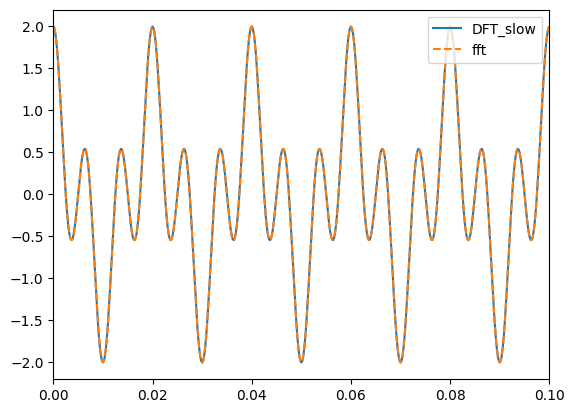

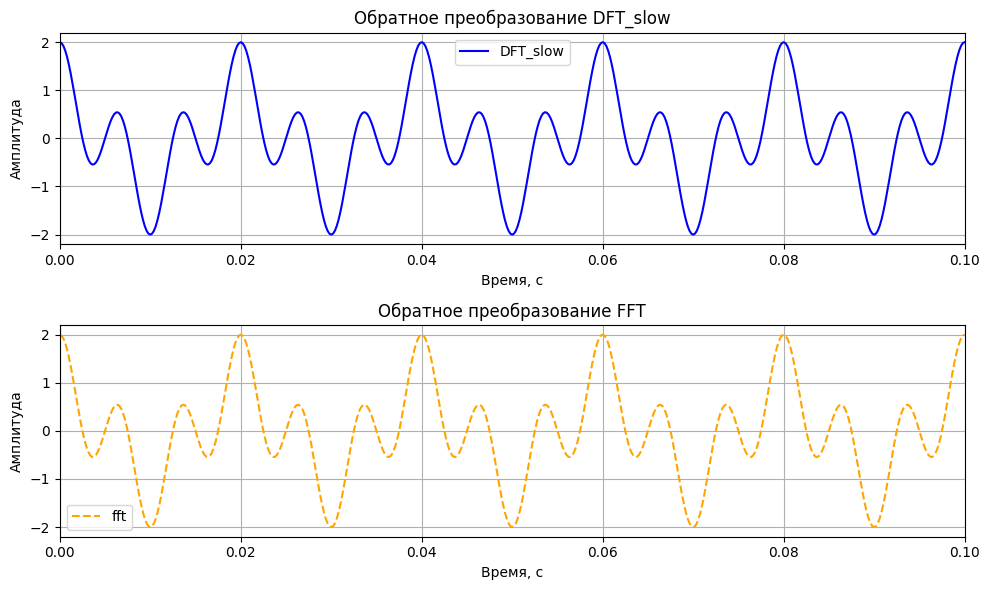

In [44]:
y1 = np.fft.ifft(yf)
y2 = np.fft.ifft(yff)

plt.plot(t_cos, y1.real, label="DFT_slow")
plt.plot(t_cos, y2.real, linestyle='--', label="fft")
plt.xlim(0, 0.1)
plt.legend()
plt.show()


# Создаем первый график для DFT_slow
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t_cos, y1.real, label="DFT_slow", color='blue')
plt.xlim(0, 0.1)
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.title('Обратное преобразование DFT_slow')
plt.legend()
plt.grid()

# Создаем второй график для FFT
plt.subplot(2, 1, 2)
plt.plot(t_cos, y2.real, linestyle='--', label="fft", color='orange')
plt.xlim(0, 0.1)
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.title('Обратное преобразование FFT')
plt.legend()
plt.grid()

# Показываем графики
plt.tight_layout()
plt.show()

# (в) После распространения сигнала в линии на приемнике был получен сигнал, искаженный белым шумом. Постройте дискретный спектр зашумленного сигнала на приемнике. Возьмите обратное преобразование Фурье и посмотрите, как поменялась форма принятого сигнала после распространения в линии.

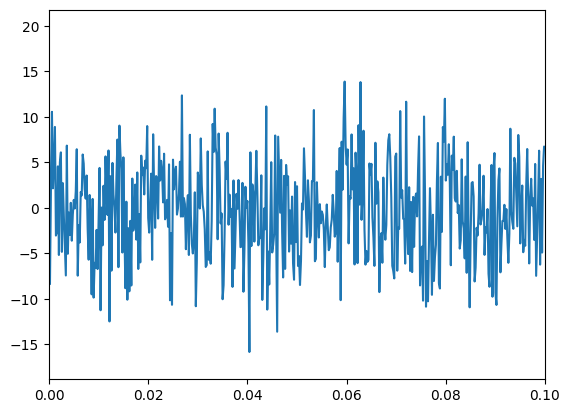

In [45]:
# зашумленный сигнал
def add_noise(signal, noise_level=1):
    '''
    Добавление к сигналу гауссовского шума 
    '''
    return signal + np.random.normal(0, noise_level, signal.shape)

y_cos_noised = add_noise(y_cos, 5)
plt.plot(t_cos, y_cos_noised)
plt.xlim(0, 0.1)
plt.show()

(0.0, 280.0)

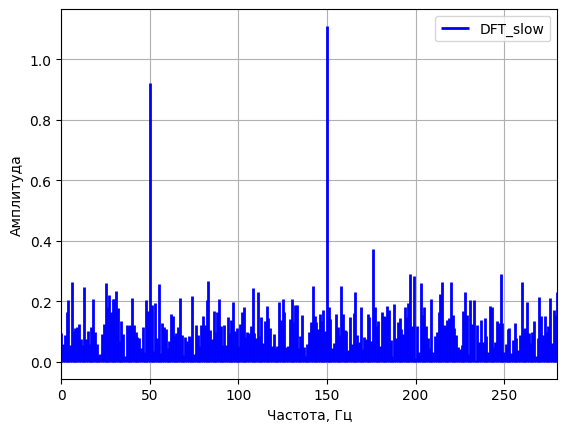

In [46]:
# зашумленный спектр
yf_noised = DFT_slow(y_cos_noised)
plt.vlines(freq_cos, 0, np.abs(yf_noised) / num_cos * 2, linewidth=2, colors='blue', label='DFT_slow')
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')
plt.legend()
plt.xlim(0, 280)

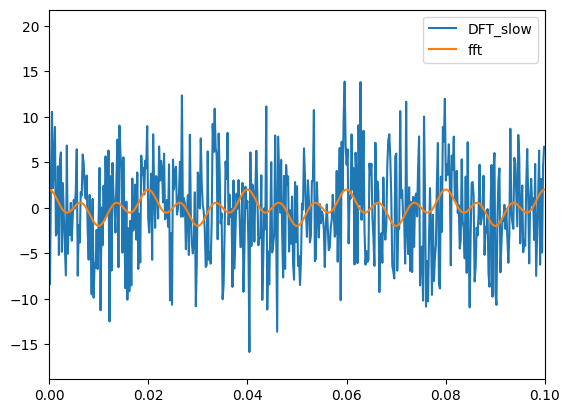

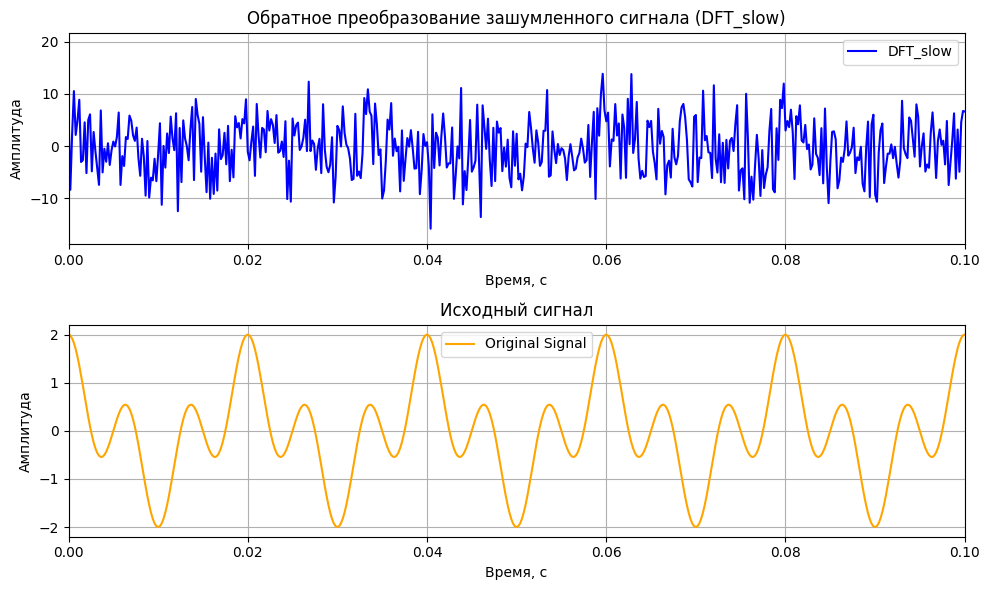

In [47]:
# обратное преобразование зашумленного сигнала
y_noised = np.fft.ifft(yf_noised)
plt.plot(t_cos, y_noised.real, label="DFT_slow")
plt.plot(t_cos, y_cos, label="fft")
plt.xlim(0, 0.1)
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t_cos, y_noised.real, label="DFT_slow", color='blue')
plt.xlim(0, 0.1)
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.title('Обратное преобразование зашумленного сигнала (DFT_slow)')
plt.legend()
plt.grid()

# Создаем второй график для исходного сигнала
plt.subplot(2, 1, 2)
plt.plot(t_cos, y_cos, label="Original Signal", color='orange')
plt.xlim(0, 0.1)
plt.xlabel('Время, с')
plt.ylabel('Амплитуда')
plt.title('Исходный сигнал')
plt.legend()
plt.grid()

# Показываем графики
plt.tight_layout()
plt.show()

# 2.

# Исследуемый сигнал x(t) описывается периодическими прямоугольными импульсами с амплитудой A=2, периодом T=2 на интервале времени от 0 до 4. Постройте дискретный спектр сигнала с помощью стандартной функции быстрого преобразования Фурье fft() и функции DFT_slow(). Наложите шум на данный сигнал, посмотрите спектр зашумленного сигнала.

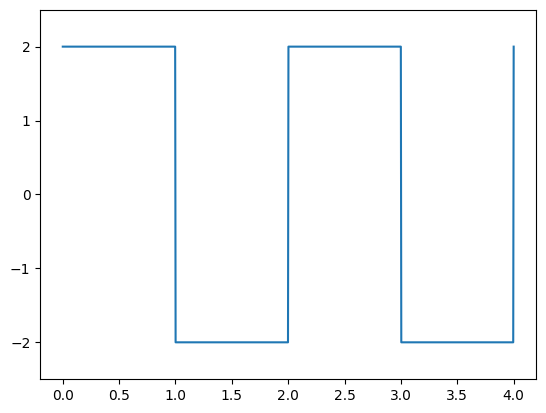

In [48]:
# прямоугольный сигнал
def square_signal(t, A, T):
    '''
    Функция возвращает значение прямоугольного сигнала в заданный момент времени t.
    t - момент времени, A - амплитуда сигнала, T - период сигнала.
    '''
    return A * signal.square(2 * np.pi * t / T)

A_square = 2
T_square = 2
num_square = 1000
t_square = np.linspace(0, 4, num_square)
y_square = square_signal(t_square, A_square, T_square)

plt.plot(t_square, y_square)
plt.ylim(-2.5, 2.5)
plt.show()

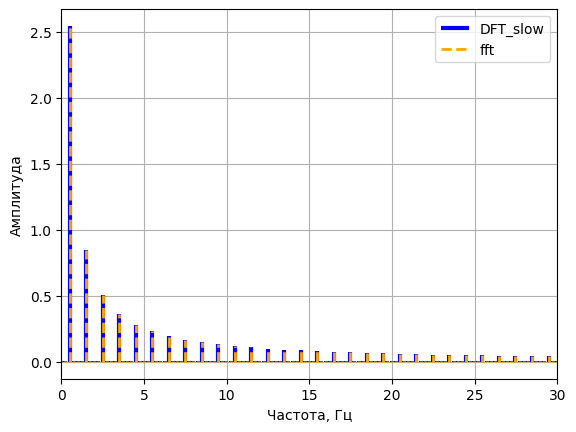

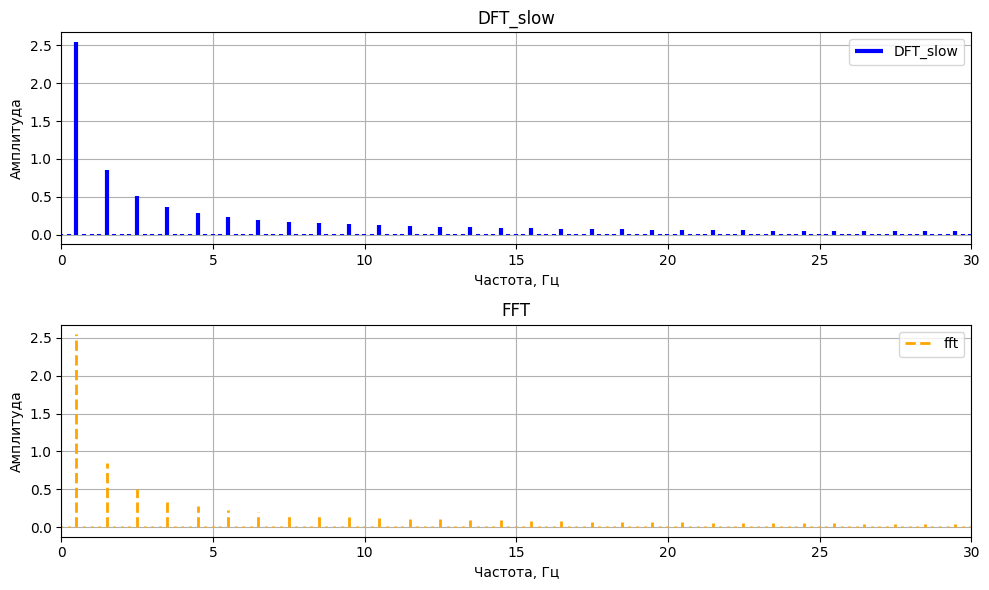

In [49]:
# дискретный спектр
freq_square = np.fft.fftfreq(len(t_square), d=(t_square[1]-t_square[0]))
yf = DFT_slow(y_square)
yff = np.fft.fft(y_square)
plt.vlines(freq_square, 0, np.abs(yf) / num_square * 2, linewidth=3, colors='blue', label='DFT_slow')
plt.vlines(freq_square, 0, np.abs(yff) / num_square * 2, linewidth=2, colors='orange', linestyles='dashed', label='fft')
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')
plt.legend()
plt.xlim(0, 30)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.vlines(freq_square, 0, np.abs(yf) / num_square * 2, linewidth=3, colors='blue', label='DFT_slow')
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')
plt.title('DFT_slow')
plt.xlim(0, 30)
plt.legend()

# Создаем второй график для FFT
plt.subplot(2, 1, 2)
plt.vlines(freq_square, 0, np.abs(yff) / num_square * 2, linewidth=2, colors='orange', linestyles='dashed', label='fft')
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')
plt.title('FFT')
plt.xlim(0, 30)
plt.legend()

# Показываем графики
plt.tight_layout()
plt.show()

# 3.

# Реализовать код для определения быстрого дискретного преобразования Фурье (БДПФ). Убедиться, что функция написана верно, для этого рассмотреть сигнал косинуса с частотой 50 Гц и убедиться, что сигнал имеет одну выделенную частоту 50 Гц. Сравните время выполнения написанного кода для реализации (БДПФ) с встроенной функцией (БДПФ) fft().

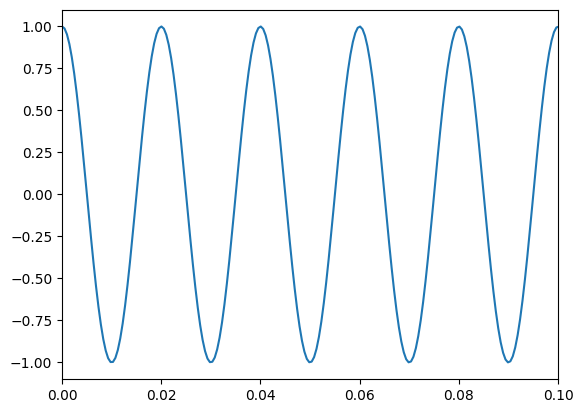

In [50]:
# сигнал косинуса
f = [50]
num_cos = 2048
# создание сигнала
t_cos = np.linspace(0, 1, num_cos)
y_cos = cos_signal(t_cos, f)
plt.plot(t_cos, y_cos)
plt.xlim(0, 0.1)
plt.show()

In [51]:
def my_fft(x):
    '''
    Быстрое преобразование Фурье одномерного массива x
    (алгоритм Кули-Тьюки)
    '''
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    
    if N % 2 > 0:
        raise ValueError("size of x must be a power of 2")
    
    if N <= 16: # порог выбран эмпирически
        return DFT_slow(x)
    
    even = my_fft(x[::2]) # рекурсивное применение FFT к четным индексам x
    odd = my_fft(x[1::2]) # рекурсивное применение FFT к нечетным индексам x
    n = np.arange(N // 2) # массив индексов
    factor = np.exp(-2j * np.pi * n / N) * odd
    return np.concatenate([even + factor, even - factor])

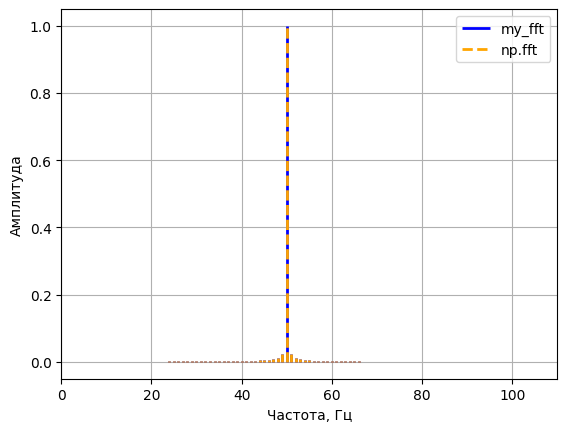

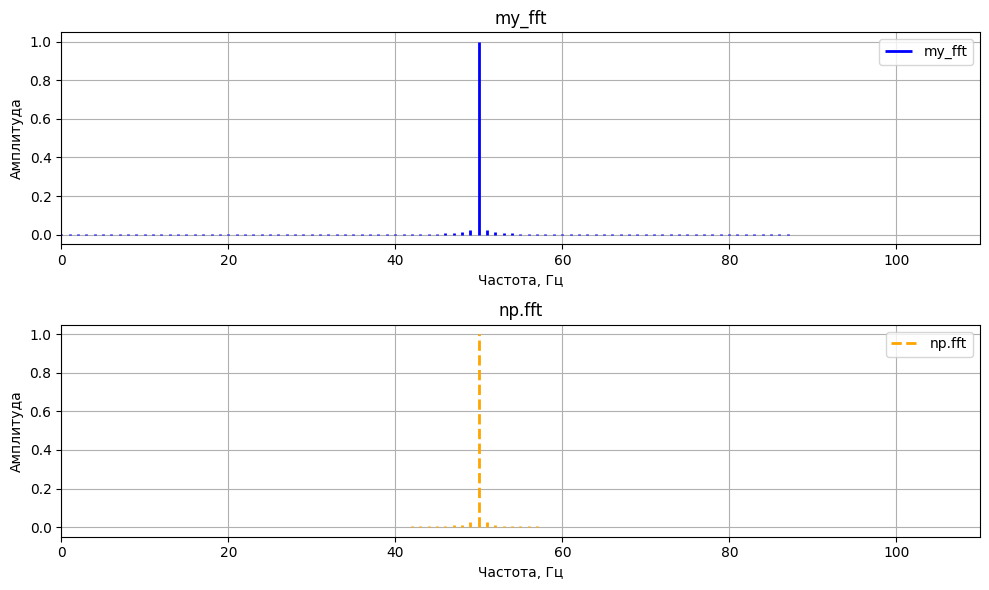

In [54]:
# дискретный спектр
freq_cos = np.fft.fftfreq(len(t_cos), d=(t_cos[1]-t_cos[0]))
my_yff = my_fft(y_cos)
yff = np.fft.fft(y_cos)
plt.vlines(freq_cos, 0, np.abs(my_yff) / num_cos * 2, linewidth=2, colors='blue', label='my_fft')
plt.vlines(freq_cos, 0, np.abs(yff) / num_cos * 2, linewidth=2, colors='orange', linestyles='dashed', label='np.fft')
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')
plt.legend()
plt.xlim(0, 110)


plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.vlines(freq_cos, 0, np.abs(my_yff) / num_cos * 2, linewidth=2, colors='blue', label='my_fft')
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')
plt.title('my_fft')
plt.xlim(0, 110)
plt.legend()

# Создаем второй график для np.fft
plt.subplot(2, 1, 2)
plt.vlines(freq_cos, 0, np.abs(yff) / num_cos * 2, linewidth=2, colors='orange', linestyles='dashed', label='np.fft')
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')
plt.title('np.fft')
plt.xlim(0, 110)
plt.legend()

# Показываем графики
plt.tight_layout()
plt.show()

In [56]:
# сравнение времени работы
print("DFT_slow:")
%timeit DFT_slow(y_cos)
print("my_fft:")
%timeit my_fft(y_cos)
print("np.fft:")
%timeit np.fft.fft(y_cos)

print("""
      1 микросекунда (μs) равна 10^-6 секунд или одной миллионной секунды.
      """
      )

DFT_slow:
152 ms ± 1.91 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
my_fft:
2.51 ms ± 42.1 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
np.fft:
15 μs ± 260 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

      1 микросекунда (μs) равна 10^-6 секунд или одной миллионной секунды.
      
